**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

**Mount Google drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Uplaod dataset CSV file from google drive**

In [19]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/crop_yeild_dataset.csv')

#Display column headers
df.head(10000)

,crop,region,N,P,K,temperature,humidity,rainfall,ph,area_ha,production_t
0,rice,Karnataka,70.7,43.6,54.9,27.2,61.2,255.9,6.95,268,928.2
1,rice,Punjab,108.8,46.9,43.4,25.5,58.7,87.0,7.08,605,2213.1
2,maize,West Bengal,91.9,34.7,30.4,27.5,73.5,349.9,5.99,410,2409.2
3,rice,Maharashtra,120.0,51.6,64.3,30.4,44.2,3.7,7.20,986,2303.9
4,sugarcane,Maharashtra,164.8,57.0,173.0,24.0,39.5,43.0,6.81,941,77299.3
...,...,...,...,...,...,...,...,...,...,...,...
9995,cotton,Punjab,66.8,46.8,60.0,27.4,80.9,36.3,7.31,528,1057.8
9996,wheat,Karnataka,118.7,62.7,31.3,32.8,84.5,69.7,5.83,501,1421.8
9997,sugarcane,Maharashtra,146.7,51.3,194.3,42.6,54.3,21.2,7.26,114,9566.8
9998,rice,Punjab,90.1,52.7,67.9,26.2,26.7,33.4,7.48,663,1670.3


**Rename Column Headers**

In [21]:
Crop_Table = df.rename(columns = {"crop":"Crop", "region": "Region", "N":"Nitrogen (N)","P":"Phosphorus (P)","K":"Potassium (K)","temperature": "Temperature (C)", "humidity": "Humidity ", "rainfall":"Rainfall (mm)","ph":"Soil PH","area_ha":"Area (Hectare)", "production_t":"Production (Ton)"})

#display rename column headers
Crop_Table.head()

,Crop,Region,Nitrogen (N),Phosphorus (P),Potassium (K),Temperature (C),Humidity,Rainfall (mm),Soil PH,Area (Hectare),Production (Ton)
0,rice,Karnataka,70.7,43.6,54.9,27.2,61.2,255.9,6.95,268,928.2
1,rice,Punjab,108.8,46.9,43.4,25.5,58.7,87.0,7.08,605,2213.1
2,maize,West Bengal,91.9,34.7,30.4,27.5,73.5,349.9,5.99,410,2409.2
3,rice,Maharashtra,120.0,51.6,64.3,30.4,44.2,3.7,7.20,986,2303.9
4,sugarcane,Maharashtra,164.8,57.0,173.0,24.0,39.5,43.0,6.81,941,77299.3


**Quick data check**

In [8]:
print("Shape:", Crop_Table.shape)
display(Crop_Table.sample(5))

print("\nDtypes:")
print(Crop_Table.dtypes)

print("\nMissing values:")
print(Crop_Table.isna().sum())

display(Crop_Table.describe(include=np.number))

cat_cols = ['Crop', 'Region']
for c in cat_cols:
    print(f"{c}: {Crop_Table[c].nunique()} unique → {sorted(Crop_Table[c].unique()[:10])} ...")

Shape: (250000, 11)


,Crop,Region,Nitrogen (N),Phosphorus (P),Potassium (K),Temperature (C),Humidity,Rainfall (mm),Soil PH,Area (Hectare),Production (Ton)
161531,maize,Tamil Nadu,111.9,49.4,61.6,33.7,82.1,146.1,6.19,383,1734.5
229097,maize,Punjab,107.8,35.9,53.7,39.5,60.4,0.0,6.94,713,3773.4
154060,sugarcane,Maharashtra,149.7,74.2,196.7,39.4,20.1,33.9,7.77,988,80948.1
128207,maize,West Bengal,96.7,22.6,44.3,27.2,78.3,330.5,5.76,53,212.9
37190,maize,Maharashtra,94.3,51.0,50.6,29.7,66.4,0.0,7.50,186,847.4



Dtypes:
Crop                 object
Region               object
Nitrogen (N)        float64
Phosphorus (P)      float64
Potassium (K)       float64
Temperature (C)     float64
Humidity            float64
Rainfall (mm)       float64
Soil PH             float64
Area (Hectare)        int64
Production (Ton)    float64
dtype: object

Missing values:
Crop                0
Region              0
Nitrogen (N)        0
Phosphorus (P)      0
Potassium (K)       0
Temperature (C)     0
Humidity            0
Rainfall (mm)       0
Soil PH             0
Area (Hectare)      0
Production (Ton)    0
dtype: int64


,Nitrogen (N),Phosphorus (P),Potassium (K),Temperature (C),Humidity,Rainfall (mm),Soil PH,Area (Hectare),Production (Ton)
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,107.971981,47.177051,79.138759,29.796679,62.014827,123.828643,6.739978,500.047020,9306.363190
std,30.380535,15.931829,63.180215,4.097005,13.852868,98.480983,0.713060,288.377456,18787.908711
min,25.500000,10.000000,20.000000,10.600000,10.000000,0.000000,4.000000,1.000000,1.000000
25%,84.800000,35.600000,40.700000,27.000000,53.300000,46.400000,6.210000,250.000000,802.800000
50%,101.400000,44.500000,52.500000,29.600000,62.900000,106.700000,6.800000,500.000000,1693.200000
75%,126.300000,56.700000,73.900000,32.300000,71.900000,182.100000,7.310000,749.000000,3535.000000
max,200.000000,80.000000,250.000000,45.000000,100.000000,500.000000,9.000000,1000.000000,110962.300000


Crop: 5 unique → ['cotton', 'maize', 'rice', 'sugarcane', 'wheat'] ...
Region: 5 unique → ['Karnataka', 'Maharashtra', 'Punjab', 'Tamil Nadu', 'West Bengal'] ...


**EDA Visualization**

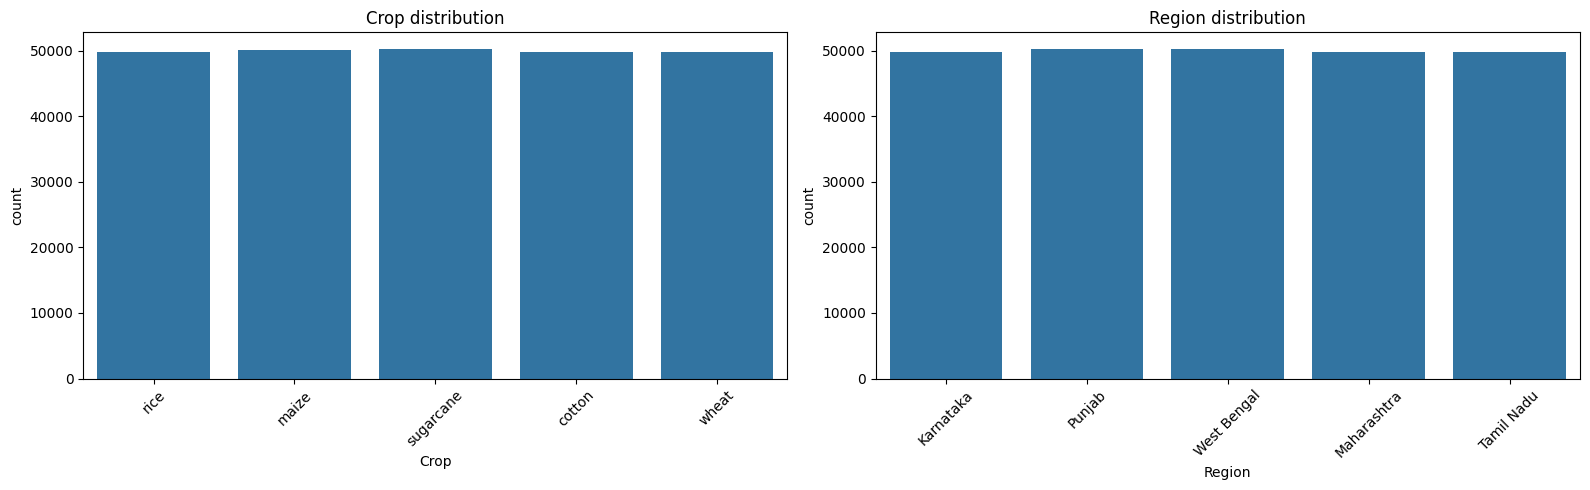

In [9]:
#Bar chart for Categorical distributions
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.countplot(x='Crop', data=Crop_Table, ax=axes[0])
axes[0].set_title('Crop distribution')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(x='Region', data=Crop_Table, ax=axes[1])
axes[1].set_title('Region distribution')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

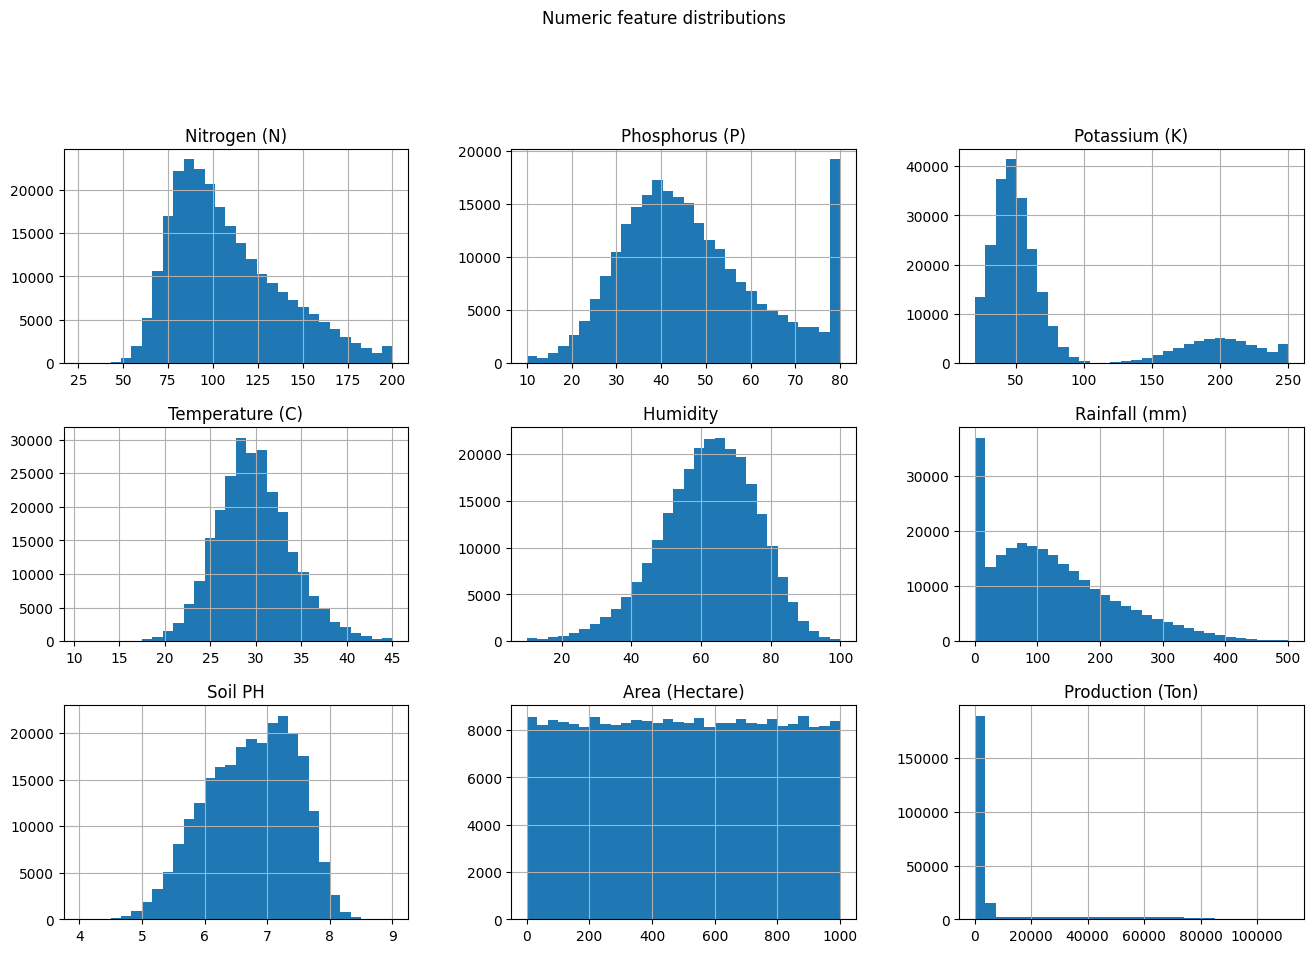

In [11]:
#Histogram for Numeric distributions
num_cols = Crop_Table.select_dtypes(include=[np.number]).columns.tolist()
Crop_Table[num_cols].hist(figsize=(16, 10), bins=30)
plt.suptitle("Numeric feature distributions", y=1.02)
plt.show()

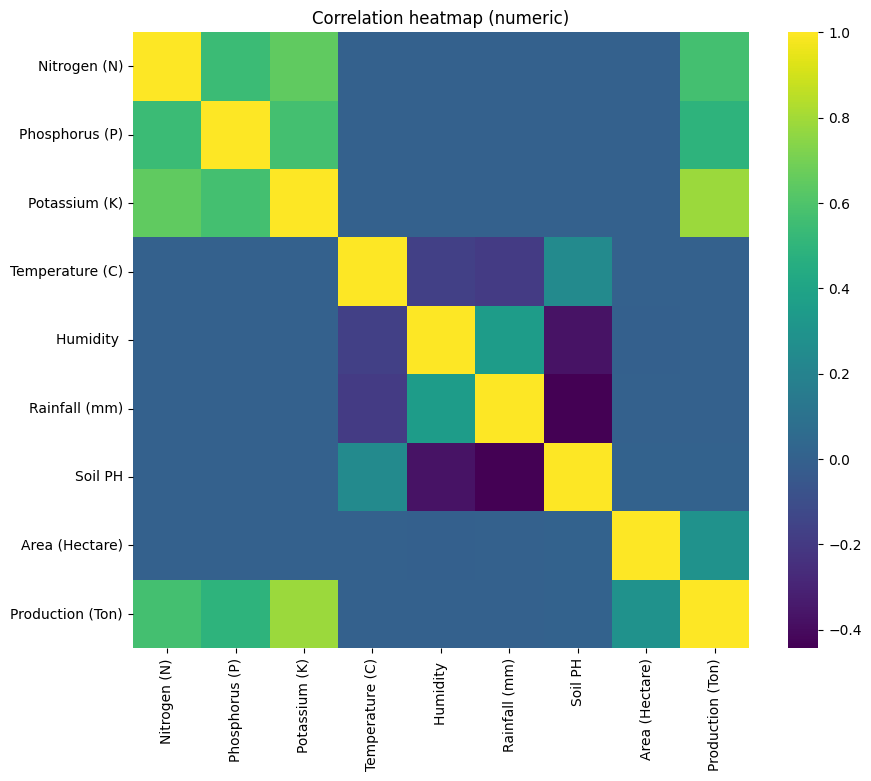

In [12]:
#Correlation Heatmap for Numeric Variables
plt.figure(figsize=(10, 8))
corr = Crop_Table[num_cols].corr()
sns.heatmap(corr, annot=False, cmap='viridis', square=True)
plt.title("Correlation heatmap (numeric)")
plt.show()

**Encoding Categorical variables**

In [15]:
#Pandas One-Hot-Encoding
cat_cols = ['Crop', 'Region']
Crop_Table_ohe = pd.get_dummies(Crop_Table, columns=cat_cols, drop_first=False)
Crop_Table_ohe.head(), Crop_Table_ohe.shape

(   Nitrogen (N)  Phosphorus (P)  Potassium (K)  Temperature (C)  Humidity   \
 0          70.7            43.6           54.9             27.2       61.2   
 1         108.8            46.9           43.4             25.5       58.7   
 2          91.9            34.7           30.4             27.5       73.5   
 3         120.0            51.6           64.3             30.4       44.2   
 4         164.8            57.0          173.0             24.0       39.5   
 
    Rainfall (mm)  Soil PH  Area (Hectare)  Production (Ton)  Crop_cotton  \
 0          255.9     6.95             268             928.2        False   
 1           87.0     7.08             605            2213.1        False   
 2          349.9     5.99             410            2409.2        False   
 3            3.7     7.20             986            2303.9        False   
 4           43.0     6.81             941           77299.3        False   
 
    Crop_maize  Crop_rice  Crop_sugarcane  Crop_wheat  Regio

In [18]:
#Download processed dataset
Crop_Table_ohe.to_csv('dataset_ohe.csv', index=False)
from google.colab import files
files.download('dataset_ohe.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>